In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/ktai17/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
'''
1. Convolution
'''

'\n1. Convolution\n'

In [3]:
'''Padding O'''

'Padding O'

In [4]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]], 
                    [[4],[5],[6]], 
                    [[7],[8],[9]]]], dtype=np.float32)

In [5]:
print(image)

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


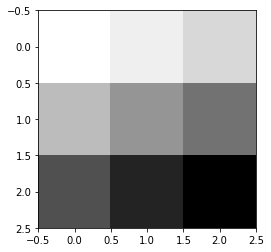

In [6]:
plt.imshow(image.reshape(3,3), cmap= 'Greys')
plt.show()

In [7]:
print(image.shape)
'''
이미지의 수, 이미지 크기 x 이미지 크기, 색상(흑백이므로 1개)
'''

(1, 3, 3, 1)


'\n이미지의 수, 이미지 크기 x 이미지 크기, 색상(흑백이므로 1개)\n'

In [8]:
# more filter
weight = tf.constant([[[[1., 10., -1.]],[[1., 10., -1.]]], 
                      [[[1., 10., -1.]],[[1., 10., -1.]]]], dtype=np.float32)

In [9]:
print(weight.shape)
'''
Filter Size x Filter Size, Filter Color, Filter의 개수
'''

(2, 2, 1, 3)


'\nFilter Size x Filter Size, Filter Color, Filter의 개수\n'

In [10]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
'''sss
1(batch 모두를 읽겠다), x stride, y stride, 1(depth of the convolution)
//
padding을 하겠다.
'''

'sss\n1(batch 모두를 읽겠다), x stride, y stride, 1(depth of the convolution)\n//\npadding을 하겠다.\n'

In [11]:
conv2d_img = conv2d.eval()

In [12]:
print(conv2d_img.shape)
'''
이미지의 수, 이미지 크기 x 이미지 크기, 색상(흑백이므로 1개)
'''

(1, 3, 3, 3)


'\n이미지의 수, 이미지 크기 x 이미지 크기, 색상(흑백이므로 1개)\n'

In [13]:
## 새로 추가
conv2d_img=np.swapaxes(conv2d_img, 0, 3)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


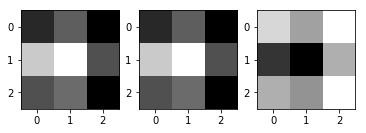

In [14]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [15]:
'''
경향성은 같지만, 
filter 1 (1, 1, 1, 1)에 비하여 filter 2(10, 10, 10, 10)이 조금 더 강화된 필터.
filter 1 (1, 1, 1, 1)과 filter 3(-1, -1, -1, -1)는 경향성이 완전 반대.
'''

'\n경향성은 같지만, \nfilter 1 (1, 1, 1, 1)에 비하여 filter 2(10, 10, 10, 10)이 조금 더 강화된 필터.\nfilter 1 (1, 1, 1, 1)과 filter 3(-1, -1, -1, -1)는 경향성이 완전 반대.\n'